## 1. Introduction

### 1.1. Domain specific area

The domain of debate was chosen to be sentiment analysis on the entertainment industry towards movie reviews. The task is quite challenging as textual feedback is to be classified to positive or negative sentiment categories, which can have important applications in recommendation systems, marketing, and consumer insight.

As such, the study on sentiment analysis in the realm of Natural Language Processing (NLP) is a popular topic, because it is directly related to the understanding of public opinions in numerous industries. For example, Pang and Lee (2008) highlighted the importance of sentiment classification to enhance the customer centric applications. Sentiment analysis plays a huge role helping IMDb and other entertainment industry platforms give the personalized recommendations and to measure the audience reception. This process allows companies to automate their ability to analyze large scale data sets, recognizing trends and patterns that help guide decision making.

This area is important because of the increasing importance of user generated content and the necessity for businesses to respond to real time feedback. Sentiment analysis delivers craftsmanship between human qualitative feedback and business quantitative strategies, and is a necessary component of today’s data analytics.

Recent studies have further shown that advanced machine learning models can be easily applied in sentiment analysis task. (1) A 2024 example was a study presented to provide an approach using a deep learning model with hyperparameters optimisation and a new Rotten Tomatoes dataset to enhance performance for sentiment analysis and better help viewers with their movie choices.

Furthermore, (2) a survey conducted in 2023 was also based on a comparison of sentiment analysis from film critics as machine learning, lexicon based and hybrid methods, showing progress in their methods of sentiment classification.

## 1.2. Objectives

This project aims to make a text classifier that can label positive or negative to movie reviews with high accuracy. In this, we study both statistical and embedding based models to evaluate and apply them in text classification tasks.

The project aims to build and compare between traditional statistical model (in particular, Naive Bayes) and an embedding based model (Logistic Regression using Word2Vec embeddings). The study assesses these models using standard classification metrics whcih are accuracy, precision, recall and F1-score to provide a complete understanding of their performance in sentiment analysis.

It is important to understand the strengths and weaknesses of these models in order to pick the right techniques when performing sentiment classification tasks. For example, (3) embedding based models have demonstrated a capability of aggrandizing semantic relationship and contextual nuance better than the traditional bag of word approach, and successfully applied in text classification.

## 1.3. Dataset Description

### Dataset Title:
For this project, I used a dataset called ‘IMDB 50K Movie Reviews – Test Your BERT’, sourced from Kaggle.

### Data Composition:
#### Size:
The dataset consists of 50,000 movie reviews divided into two CSV files:
train.csv: It contains 25,000 movie reviews for training.
test.csv: Has 25,000 movie reviews for testing purposes.

#### Data Types:
Textual Data: It consists of text format detailed movie review of each entry.
Labels: Sentiment (positive or negative) of the review is labeled as "negative" or "positive" for each review.

### Data Acquisition:
The dataset was extracted from IMDb, a clout database of movies and television. it was curated in order to support sentiment analysis and other natural language processing tasks. The reviews are prelabeled, which makes the dataset suitable for supervised machine learning experiment.

### Source:
The dataset is freely available and hosted on Kaggle, the famous data science platform. You can discover the specific dataset on this URL https://www.kaggle.com/datasets/atulanandjha/imdb-50k-movie-reviews-test-your-bert

## 4. Evaluation Methodology

To evaluate the performance of the implemented models, five key metrics were utilized:

#### Accuracy:
as it measures the fraction of reviews that were correctly classified in the complete dataset giving a single measurement of model accuracy. Accuracy is a useful metric but won’t reflect performance when dealing with imbalanced datasets.

$$
\text{Accuracy} = \frac{True Positives(TP) + True Negatives(TN)}{True Positives(TP) + True Negatives(TN) + False Positives(FP) + False Negatives(FN)}
$$

#### Precision:
is the ratio of correctly predicted positive vs predicted positives, indicating the reliability of the model in labeling a review positively. If false positives matter, this metric is particularly critical.

$$
\text{Precision} = \frac{True Positives(TP)}{True Positives(TP) + False Positives(FP)}
$$

#### Recall:
also known as sensitivity, is calculated by just taking the number of correctly predicted positive reviews, and dividing it by the total actual positive reviews. For assessment of the model's skill in finding all positive (real) instances, it is essential.

$$
\text{Recall} = \frac{True Positives(TP)}{True Positives(TP) + False Negatives(FN)}
$$

#### F1-Score:
Precision and recall are also taken as harmonic mean to define F1-Score, the overall measure that combines both false positives and false negatives. Specifically, it is well suited for comparing models in situations where tradeoff between precision and recall are important.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### F2-Score:
Where there are more false negatives than false positives (missed positive comparisons) compared to false positives (false positives), F2-Score has a high value, as it places more focus on recall over precision. In this regard, this metric shows an alternative way of assessing model performance in a particular context.

$$
\text{F2 Score} = (1 + 2^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(2^2 \cdot \text{Precision}) + \text{Recall}}
$$

## 2. Implementation

### 2.1. Data preprocessing

This section imports the libraries required for the project:

In [6]:
from google.colab import files


uploaded = files.upload()


Saving test.csv to test.csv


In [7]:
from google.colab import files


uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, confusion_matrix
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Then, loading the training and testing datasets based on the file paths provided to them. These CSV files are read in to DataFrame objects we named train_data and test_data using the pd.read_csv() function from pandas library. This step is imperative to consequently make the data usable in preprocessing and then analysis.

In [9]:
# Load datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print("Datasets loaded successfully:")
print(f"Training dataset shape: {train_data.shape}")
print(f"Testing dataset shape: {test_data.shape}")

Datasets loaded successfully:
Training dataset shape: (25000, 2)
Testing dataset shape: (25000, 2)


This section of the codedefines a preprocessing function which then is applied to both the training and testing datasets.

Preprocessing Function:
The function preprocess_text takes a single piece of text as input and performs the following steps:

Tokenization:
Word_tokenize is used to split each line in to individual tokens (words) and then the text is converted to lower case. This is done to de-casualize the words like 'Good' and 'good'.

Removal of Special Characters and Numbers:
It removes special characters and numbers from the tokens; only tokens containing only alphabetic characters are kept. It removes noise in data.

Stopword Removal:
We remove commonly occurring words with little semantic value (e.g. "is", "the", "and") from the English stopword list within the NLTK library. Thus we stay focused on meaningful words.

Lemmatization:
The WordNetLemmatizer reduces words to their base (or root) form. For example: run <> running. Grouping different forms of the same word is the benefit of this step.

Joining Tokens:
With that, we join cleaned tokens back into a single string as the preprocessed text.

In [10]:
# Define a preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lowercase
    # Remove special characters and numbers
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Preprocess training data
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
print(train_data[['text', 'processed_text']].head())

# Preprocess testing data
test_data['processed_text'] = test_data['text'].apply(preprocess_text)
print(test_data[['text', 'processed_text']].head())

                                                text  \
0  Now, I won't deny that when I purchased this o...   
1  The saddest thing about this "tribute" is that...   
2  Last night I decided to watch the prequel or s...   
3  I have to admit that i liked the first half of...   
4  I was not impressed about this film especially...   

                                      processed_text  
0  wo deny purchased ebay high expectation incred...  
1  saddest thing tribute almost singer including ...  
2  last night decided watch prequel shall say cal...  
3  admit liked first half sleeper looked good act...  
4  impressed film especially fact went cinema fam...  
                                                text  \
0  My daughter liked it but I was aghast, that a ...   
1  I... No words. No words can describe this. I w...   
2  this film is basically a poor take on the old ...   
3  This is a terrible movie, and I'm not even sur...   
4  First of all this movie is a piece of reality ... 

In addition, the dataset is split to train and evaluate the model with two different sets of data. The performance on unseen data is critical to be assessed with this approach, and it is a realistic indicator of generalization capabilities of the model.

For this implementation, 80% of the training dataset is trained while the last 20% of the testing dataset is used for evaluation, i.e., the model is applied on the testing dataset to report its performance. The model will train on the training set and do not touch the testing set (remember the testing set is usually not seen by the model at all), and it will use the testing set (testing set is an unbiased benchmark of how well the model generalizes to the unseen data).

In [11]:
# Split training data: Use 80% of train.csv for training
train_split = int(len(train_data) * 0.8)
X_train = train_data['processed_text'][:train_split]
y_train = train_data['sentiment'][:train_split]

# Split testing data: Use 20% of test.csv for testing
X_test = test_data['processed_text'][:len(test_data) // 5]
y_test = test_data['sentiment'][:len(test_data) // 5]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (20000,), y_train shape: (20000,)
X_test shape: (5000,), y_test shape: (5000,)


Here we train a Word2Vec model based on the architecture Continuous Bag of Words (CBoW) to represent words using word embeddings, and the embeddings capture semantic relationships among words. We train our model on tokens reviews from the training dataset, using it to create 100 size vector representation for each word on it vocabulary. For the training and testing datasets we use these embeddings to create feature vectors for each review just by averaging the word embeddings of each review. The process guarantees that the input features of the machine learning model are enriched with semantic information which improves sentiment classification processes.

In [12]:
# Train the Word2Vec model (CBoW)
print("\nTraining Word2Vec (CBoW) model...")
tokenized_reviews = [word_tokenize(review) for review in X_train]
cbow_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4, sg=0)  # sg=0 for CBoW

# Print the size of the vocabulary
print(f"Vocabulary size: {len(cbow_model.wv)}")

# Create Word Vectors for X_train
print("\nCreating Word Vectors for X_train...")
X_train_word_vector = np.array([
    np.mean([cbow_model.wv[word] for word in review if word in cbow_model.wv], axis=0)
    if any(word in cbow_model.wv for word in review) else np.zeros(100)
    for review in tokenized_reviews
])
print(f"X_train_word_vector shape: {X_train_word_vector.shape}")

# Create Word Vectors for X_test
print("\nCreating Word Vectors for X_test...")
X_test_word_vector = np.zeros((len(X_test), 100))
for i, review in enumerate(X_test):
    word_vectors = [cbow_model.wv[word] for word in review.split() if word in cbow_model.wv]
    if word_vectors:
        X_test_word_vector[i] = np.mean(word_vectors, axis=0)
print(f"X_test_word_vector shape: {X_test_word_vector.shape}")


Training Word2Vec (CBoW) model...
Vocabulary size: 58342

Creating Word Vectors for X_train...
X_train_word_vector shape: (20000, 100)

Creating Word Vectors for X_test...
X_test_word_vector shape: (5000, 100)


### 2.2. Baseline performance

In this section, we use a Multinomial Naive Bayes classifier as a baseline over a sentiment classifier. Then, we transform training data to represent them as TF-IDF (Term Frequency-Inverse Document Frequency) features, and the model is trained on such transformed training data. Metrics like accuracy, F1sore, and F2 score are computed for the performance of the model on the test set.

In [13]:
# Baseline: Naive Bayes Classifier with TF-IDF
print("\nBaseline: Naive Bayes Classifier with TF-IDF")
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_tfidf_predictions = nb_tfidf_model.predict(X_test_tfidf)

# Print the performance of the model
print("Naive Bayes with TF-IDF Performance:")
print(classification_report(y_test, nb_tfidf_predictions))
print("Accuracy:", accuracy_score(y_test, nb_tfidf_predictions))
print("F2-Score:", fbeta_score(y_test, nb_tfidf_predictions, beta=2, average='weighted'))



Baseline: Naive Bayes Classifier with TF-IDF
Naive Bayes with TF-IDF Performance:
              precision    recall  f1-score   support

         neg       0.80      0.88      0.84      2491
         pos       0.87      0.79      0.82      2509

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

Accuracy: 0.8314
F2-Score: 0.8308412486517655


The applied Naive Bayes model operates with 83.14% of accuracy and F2 score of 0.83, that defines rather high effectiveness for the chosen dataset.

Relative to such models as Logistic Regression with Word2Vec embeddings, the LSTM-based deep learning models, Naive Bayes classifier also proves to be rather efficient in terms of its simplicity and performance. But it has a severe limitation in capturing contextual or sequential information in the text, for which the embedding-based and neural network-based implementation are more suitable. For instance, even though the model Logistic Regression with Word2Vec performs nearly as well as the other models, it uses pre-trained vectors to recognize the relational semantics more naturally. A further enhancement of performance is provided through LSTM since, even though their learning process considers the dynamic embedding learning and the dependence on persistent values, their application has a higher computational complexity.

### 2.3. Comparative classification approach

In this section I applied Logistic Regression using Word2Vec features for sentiment classification. It learns dense word representations which words at the same distance in the vector space will tend to be similar to each other. These vectors capture contextuality as well as semantic relationships between words. The model is evaluated in terms of accuracy, F1 score and F2 score to show that using Word2Vec embeddings is helpful to the statistical text classification model.

In [14]:
# Statistical Model: Logistic Regression with Word2Vec
print("\nStatistical Model: Logistic Regression with Word2Vec")
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_word_vector, y_train)  # Use Word2Vec vectors for training
log_reg_predictions = log_reg_model.predict(X_test_word_vector)  # Use Word2Vec vectors for testing

# Print the performance of the model
print("Logistic Regression with Word2Vec Performance:")
print(classification_report(y_test, log_reg_predictions))
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("F2-Score:", fbeta_score(y_test, log_reg_predictions, beta=2, average='weighted'))



Statistical Model: Logistic Regression with Word2Vec
Logistic Regression with Word2Vec Performance:
              precision    recall  f1-score   support

         neg       0.82      0.82      0.82      2491
         pos       0.82      0.82      0.82      2509

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000

Accuracy: 0.8222
F2-Score: 0.8221986693460469


This section shows a deep learning model to perform sentiment classification with Long Short Term Memory (LSTM). In comparison to standard machine learning model like SVM with RBF kernel, as an LSTM model makes use of sequential information and identifies semantic relationship as well as contextual subtleties among words. Input features of the LSTM model are taken out of text sequences which are tokenized, and then represented via the word embeddings.

The LSTM network is trained using padded sequences of tokens from tokenized text using the Adam optimizer. The model is then trained, which then predicts sentiment on a test set, and there are standard classification metrics used to assess the performance of the model (accuracy, F1 score and F2 score).


In [15]:
# Encode labels
encoder = LabelEncoder()
# Convert string labels to integer labels for the training set
y_train = encoder.fit_transform(y_train)
# Transform test labels using the same encoding
y_test = encoder.transform(y_test)

# Ensure labels are floats
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
 # Calculate vocabulary size (add 1 for padding/indexing)
vocab_size = len(tokenizer.word_index) + 1

# Maximum sequence length; truncate/pad longer/shorter sequences
max_length = 100
# Convert text data to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
# Pad sequences to the same length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')

# Convert test text data to sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test)
# Pad test sequences
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Build the model
model = Sequential()
# Embedding layer to learn word embeddings
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
# LSTM layer with 128 units, outputting the last hidden state
model.add(LSTM(128, return_sequences=False))
# Dense layer for binary classification with a sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# Predict on the test set and threshold predictions at 0.5
predictions = (model.predict(X_test_padded) > 0.5).astype("int32")
print("Deep Learning (LSTM) Performance:")
print(classification_report(y_test, predictions))

# Calculate and print the F2-score
f2 = fbeta_score(y_test, predictions, beta=2, average='binary')
print(f"F2 Score: {f2:.4f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 148s 289ms/step - accuracy: 0.5753 - loss: 0.6676 - val_accuracy: 0.6260 - val_loss: 0.6476
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 281ms/step - accuracy: 0.7595 - loss: 0.5196 - val_accuracy: 0.7735 - val_loss: 0.5589
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 254ms/step - accuracy: 0.8674 - loss: 0.3347 - val_accuracy: 0.8185 - val_loss: 0.4194
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 263ms/step - accuracy: 0.9267 - loss: 0.2087 - val_accuracy: 0.8468 - val_loss: 0.3894
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 252ms/step - accuracy: 0.9700 - loss: 0.1013 - val_accuracy: 0.8553 - val_loss: 0.4359
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 262ms/step - accuracy: 0.9872 - loss: 0.0495 - val_accuracy: 0.8500 - val_loss: 0.5025
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 137s 251ms/step - accuracy: 0.9923 - loss: 0.0312 - val_accuracy: 0.8475 - val_loss: 0.5874
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 253ms/step - accuracy: 0.9959 - loss: 0.02

The training of the Logistic Regression model was fairly fast hence will be suitable to use where simplicity and time efficiency is desirable. Despite this, it benefitted from pre-trained Word2Vec embedding where it offered a semantic context but was rigid in relation to the dataset.

However, LSTM model extracted more contextual and sequential information during the process of dynamic embedding. This adaptability paid off in terms of slightly higher average performance but at the same time increased enormously the computational load and the risk of overfitting the models.

Both comparative results reveal a trade-off between the computational cost of the algorithm and the degrees of freedom of the model in question. Compared to other methods, Logistic Regression with Word2Vec is a much easier and quicker solution for datasets with clear sentiment profiles. On the other hand, LSTM model performs best when the deeper contextual information is required given if enough of regularization and hyperparameters have been tuned to avoid the effect of overfitting.

This work offers an insightful angle by comparing the results of both models and provides new promising directions for future application of sentiment analysis models based on statistical machine learning and deep learning methodologies.

## 3. Conclusions

### 3.1. Performance analysis and comparatuve discussion

To evaluate the sentiment classification models, metrics such as accuracy, F1-score, and F2-score were used to assess performance across three approaches: I used naive Bayes with TF-IDF, Logistic Regression with Word2Vec embeddings, a Deep Learning base LSTM model. The strengths and weaknesses of each model were analyzed qualitatively and quantitatively.

#### Model Performance Comparison
With TF-IDF, we obtained an accuracy of 83.1% and an F2 score of 0.8308 using Naive Bayes. Overall, its performance on the sparse high dimensional data was good as shown by the precision of both the positive and the negative classes. However, it had a hard time grabbing on to textured and non linear relationships in the text data. Naive Bayes performed poorly in the confusion matrix when it over predicted some classes because of its strong independence assumptions, which make it a poor contextual agent.

The Word2Vec embeddings with a Logistic Regression yielded the accuracy of 82.2% and an F2 score of 0.8222. Unsurprisingly, it slightly underperformed Naive Bayes in terms of accuracy but was balanced across positive and negative classes. This worked because it used Word2Vec embeddings which helped it to preserve sense relationships between words and improve its review classification performance. Nevertheless, it wrestled with dealing with finer contextual nuances, and its linear nature also constrained its use of the embeddings to the full extent.

Naive Bayes has an accuracy of 83%, and an F2 user score of 0.8311, both of which are matched by LSTM (Deep Learning) with an accuracy of 83; this performs second to Naive Bayes overall but excels in contextual understanding. For which are nuanced and complex reviews, the LSTM model was very effective using sequential data and learned long term dependencies. Nevertheless, training times for the model were orders of magnitude longer than for the other models. Moreover, it was over fitting sensitive and tended to plateau on performance due to the need of careful tuning of its hyper parameters (e.g., sequence length, embedding dimensions).

#### Strengths and Weaknesses
Naive Bayes: Fast for sparse data and highly effective, but cannot model non-linear relationships and context persistence.

Logistic Regression: They are consistent and interpretable for well defined linear datasets but hinder the fullest degree power of word embeddings.

LSTM: Computationally expensive and sensitive to hyperparameter tuning, superior at capturing sequential and contextual nuances.

#### Scenarios and Hypotheses

Naive Bayes is the choice for building algorithms for large datasets with sparse high dimensional features, where computational efficiency is paramount. If an optimisation problem is linear, and can benefit from embeddings for semantic understanding without sequential modeling, Logistic Regression is used as it is a good way to perform linear problems. LSTM shines in the case of tasks that require deep contextual understanding, e.g. reviews with fine grained sentiment shift.

There may also be performance disparities from how models use features. Unlike Logistic regression, naive bayes uses term frequency, not considering context, while Logistic regression considers semantic relations. LSTM, utilizing the sequential learning properties, is very suitable for the reviews in which review's structure and word order matter a lot in sentiment classification.

This analysis shows that none of these models is absolutely correct, it depends on dataset complexity and task requirements.

<ipython-input-22-b8819061d915>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=metric_values, palette="viridis")


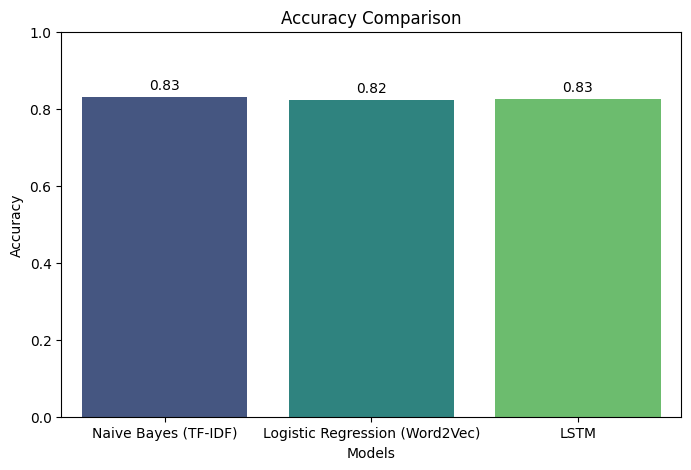

<ipython-input-22-b8819061d915>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=metric_values, palette="viridis")


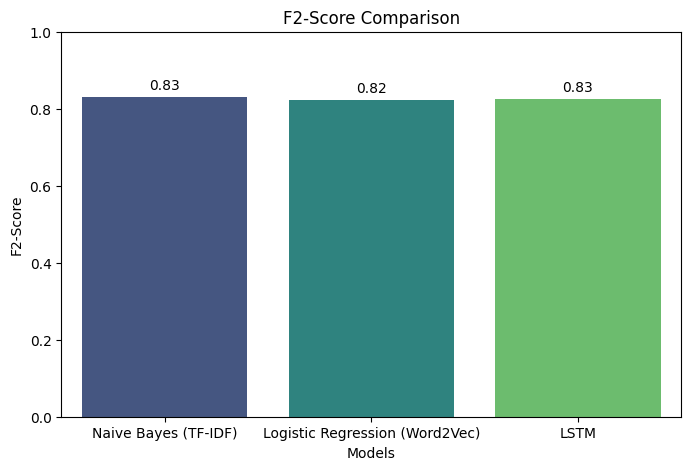

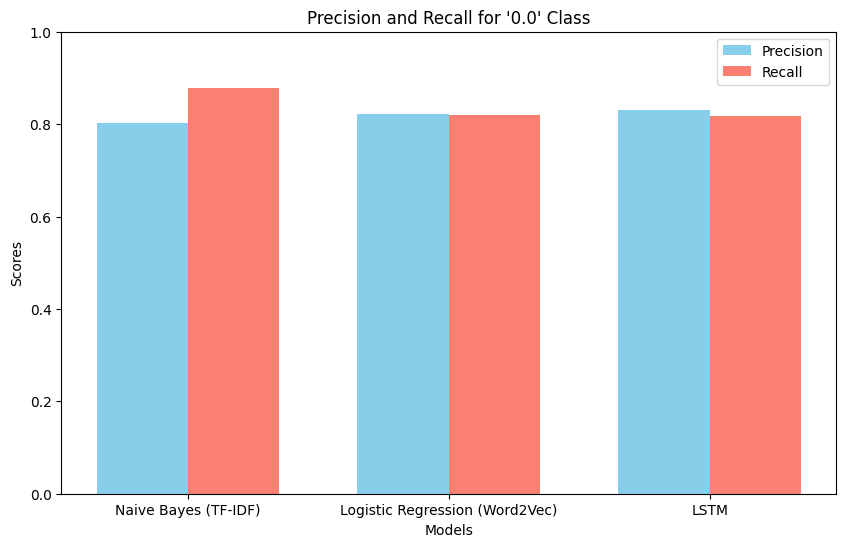

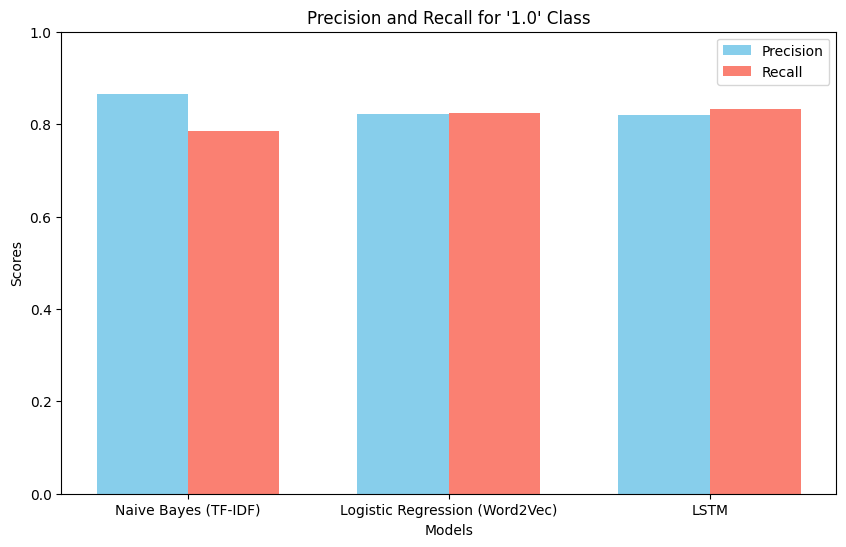


Comparing Model Performance with Visualizations...


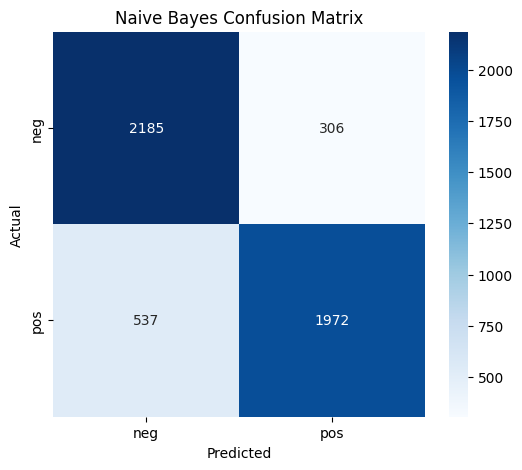

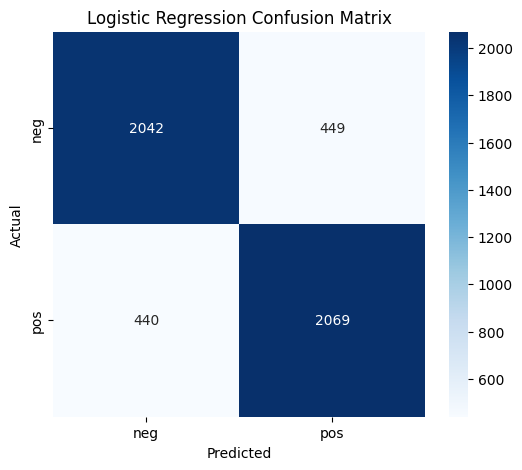

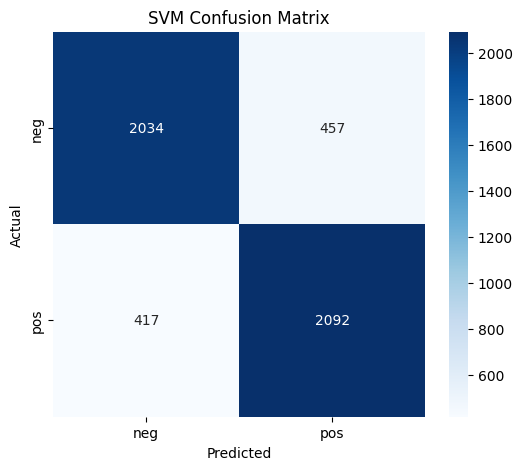

In [22]:
# Accuracy and F2-Score Comparison
def plot_metric_comparison(models, metric_values, metric_name):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=models, y=metric_values, palette="viridis")
    plt.title(f"{metric_name} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
    for i, value in enumerate(metric_values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
    plt.show()

# Convert true labels to string for comparison (if needed)
y_test_strings = encoder.inverse_transform(y_test.astype("int32"))  # Convert to "neg", "pos"

# Convert predictions to numeric labels consistently
nb_tfidf_predictions_num = encoder.transform(nb_tfidf_predictions)  # Ensure numeric predictions
log_reg_predictions_num = encoder.transform(log_reg_predictions)
# Changed line: Transform LSTM prediction using encoder
predictions_num = encoder.transform(["neg" if pred == 0 else "pos" for pred in predictions.flatten()])

# Model names and their metrics
models = ["Naive Bayes (TF-IDF)", "Logistic Regression (Word2Vec)", "LSTM"]
accuracies = [
    accuracy_score(y_test, nb_tfidf_predictions_num),  # Use numeric predictions
    accuracy_score(y_test, log_reg_predictions_num),  # Use numeric predictions
    accuracy_score(y_test, predictions_num)          # Use numeric predictions
]
f2_scores = [
    fbeta_score(y_test, nb_tfidf_predictions_num, beta=2, average='weighted'),  # Use numeric predictions
    fbeta_score(y_test, log_reg_predictions_num, beta=2, average='weighted'),  # Use numeric predictions
    fbeta_score(y_test, predictions_num, beta=2, average='weighted')           # Use numeric predictions
]

# Plot Accuracy Comparison
plot_metric_comparison(models, accuracies, "Accuracy")

# Plot F2-Score Comparison
plot_metric_comparison(models, f2_scores, "F2-Score")

# Precision and Recall per Class
def plot_precision_recall(models, reports, class_label):
    # Change 'neg' and 'pos' to '0.0' and '1.0'
    class_label = '0.0' if class_label == 'neg' else '1.0'
    precisions = [report[class_label]["precision"] for report in reports]
    recalls = [report[class_label]["recall"] for report in reports]

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, precisions, width, label='Precision', color='skyblue')
    plt.bar(x + width/2, recalls, width, label='Recall', color='salmon')
    plt.title(f"Precision and Recall for '{class_label}' Class")
    plt.xticks(x, models)
    plt.xlabel("Models")
    plt.ylabel("Scores")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

# Classification reports
nb_tfidf_report = classification_report(y_test, nb_tfidf_predictions_num, output_dict=True)
log_reg_report = classification_report(y_test, log_reg_predictions_num, output_dict=True)
lstm_report = classification_report(y_test, predictions, output_dict=True)


# Plot Precision and Recall for 'neg' class
plot_precision_recall(models, [nb_tfidf_report, log_reg_report, lstm_report], "neg")

# Plot Precision and Recall for 'pos' class
plot_precision_recall(models, [nb_tfidf_report, log_reg_report, lstm_report], "pos")

# Visualization for Comparative Analysis
print("\nComparing Model Performance with Visualizations...")
def plot_confusion_matrix(y_true, y_pred, title):
    # Convert string labels in y_pred to numeric if needed
    if isinstance(y_pred[0], str):  # Check if elements are strings
        y_pred = encoder.transform(y_pred)  # Transform to numeric labels

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, nb_tfidf_predictions, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, log_reg_predictions, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, predictions, "LSTM Confusion Matrix")


### 3.2. Project summary and reflections

This project confirmed the notion of trade offs between statistical and embedding based models in the sentiment classification domain. We explored a variety of approaches using Naive Bayes with TF-IDF, Logistic Regression with Word2Vec embeddings, and an LSTM model, drawing from each to maximize its strengths individually. Logistic Regression was found to be a balanced and practical solution to linear sentiment tasks and LSTM presented its strength in capturing sequential relationships and contextual nuances. However, for sparse data, Naive Bayes turned out to be efficient, while for complex patterns it could not be optimized well, stressing the need for a proper choice of a model fitting to the task needs and the characteristics of the dataset.

These models have practical implications in real world applications, including customer feedback analysis, sentiment monitoring in social media and product reviews. Naive Bayes and other statistical models work well for large datasets where we crave fast, interpretable results, whereas embedding based methods are very good at semantic understanding or even slight sentiment shifts. For example, LSTM models could process very specific customer reviews where a word order or a context can make huge difference in meaning.

Through this project, we realized that the correctness of any model is bound by the structure of the data as well as its complexity. Although more nuanced predictions were demonstrated using embedding based methods, these methods were computationally expensive and required hyperparameter tuning. It shows how to trade off computational feasibility with performance goals.

As a future work, advanced embedding techniques such as pre trained models (e.g., BERT or GPT) or transformer based architecture may also improve performance leveraging contextual embeddings. Finally considering ensemble methods which combine the strengths of statistical and deep learning models might increase classification accuracy. We also would like to refine hyperparameter optimization for embedding based models and try various domain specific pre-trained embeddings to see if results are better.

This project is promising to be transferable to other domains. While our focus was on performing sentiment analysis in movie reviews — similar methodologies can be applied to health care (e.g. patient feedback analysis), finance (customer sentiment about products) or education (student reviews of courses). Yet the success will depend heavily on tailoring of pre processing and embedding techniques to the target domain.

## Refrences

1. https://www.science-gate.com/IJAAS/2024/V11I8/1021833ijaas202408016.html?
2. https://link.springer.com/article/10.1007/s00521-023-08359-6?
3. https://link.springer.com/article/10.1007/s10115-023-01856-z?
4. https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/
5. https://keras.io/api/layers/recurrent_layers/lstm/
6. https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
7. https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html